<a href="https://colab.research.google.com/github/jwalx/Tensorflow/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles

In [2]:
tf.test.gpu_device_name()
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
n_samples = 1000
X,y  =make_circles(n_samples,
                   random_state =42,
                   noise =0.03)

In [4]:
len(X),len(y)

(1000, 1000)

In [5]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [6]:
import pandas as pd
circles  = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"labels":y})
circles.head(10)

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
circles.labels.value_counts()

1    500
0    500
Name: labels, dtype: int64

In [8]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

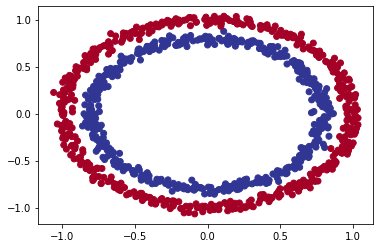

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c = y,cmap=plt.cm.RdYlBu)

## Steps in modelling 
the steps in modelling with Tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model  
4. Evaluate model
5. Tweak
6. Evaluate..


In [10]:
#Set random seed
tf.random.set_seed(42)

# 1. Create model
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(10)
])

# 2.Compile
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.1),
                metrics=["accuracy"])

# 3. Model fitting
model_1.fit(X,y,epochs=10)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 1.3494 - accuracy: 0.1350
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.0310
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7068 - accuracy: 0.0430
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.0770
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.0650
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7071 - accuracy: 0.0810
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.2020
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.0580
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.1040
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.0650


In [11]:
#Train for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.7092 - accuracy: 0.0000e+00


[0.7091594934463501, 0.0]

## lets add one more layer to the model


In [12]:
# set random seed
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


In [13]:
model_2.fit(X,y,epochs=100,verbose=0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.2980


[0.6931957006454468, 0.2980000078678131]

Try imporving using activation layers


In [14]:
# Set random seed
tf.random.set_seed(42)

# creating model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation =tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation =tf.keras.activations.sigmoid)   
])

# Compile
model_3.compile(loss =tf.keras.losses.BinaryCrossentropy(),
              optimizer =tf.keras.optimizers.Adam(),
              metrics=["accuracy"])



In [15]:
model_3.fit(X,y,epochs=100,verbose=2)
model_3.evaluate(X,y)

Epoch 1/100
32/32 - 1s - loss: 0.6903 - accuracy: 0.5040 - 504ms/epoch - 16ms/step
Epoch 2/100
32/32 - 0s - loss: 0.6861 - accuracy: 0.5000 - 78ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 0.6818 - accuracy: 0.5000 - 79ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6779 - accuracy: 0.5000 - 76ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.6718 - accuracy: 0.5000 - 76ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.6609 - accuracy: 0.5040 - 81ms/epoch - 3ms/step
Epoch 7/100
32/32 - 0s - loss: 0.6491 - accuracy: 0.6500 - 87ms/epoch - 3ms/step
Epoch 8/100
32/32 - 0s - loss: 0.6327 - accuracy: 0.6870 - 84ms/epoch - 3ms/step
Epoch 9/100
32/32 - 0s - loss: 0.6130 - accuracy: 0.7710 - 79ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.5874 - accuracy: 0.8720 - 74ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.5615 - accuracy: 0.8940 - 74ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.5284 - accuracy: 0.9610 - 79ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s

[0.0044932616874575615, 1.0]

In [16]:
import numpy as np

To visualize our model's prediction, let's create a function `plot_decision_boundary()`

In [17]:
def plot_decision_boundary(model,X,y):
  # define the axis boundaries of the plot and creaet a meshgrid
  x_min,x_max  =X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max = X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  
  # Create X value
  x_in =np.c_[xx.ravel(),yy.ravel()]   # stack 2D arrays together

  #make predictions
  y_pred = model.predict(x_in)

  #check for multi-class
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    #we have to reshape our predictions to get ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  #plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


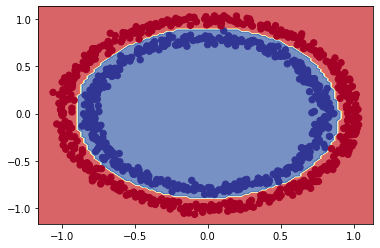

In [18]:
#checking the decision boundary function
plot_decision_boundary(model=model_3,X=X,y=y)

In [19]:
x_min,x_max  =X[:,0].min()-0.1,X[:,0].max()+0.1
y_min,y_max = X[:,1].min()-0.1,X[:,1].max()+0.1

x_min,x_max,y_min,y_max
xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
xx,yy
  

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [20]:
# Let's see if our model can be used for regression problem...

tf.random.set_seed(42)

#create regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) #here y =X +100

X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [21]:
#splitting regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#Fit model to regression data
X_reg_train,X_reg_test,y_reg_test,y_reg_train

(<tf.Tensor: shape=(150,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([750, 755, 760, 765, 770, 775, 780, 78

In [22]:
# Create a model to fit this regression problem

#set random seed
tf.random.set_seed(42)

#create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile
model_4.compile(loss=tf.keras.losses.mae,
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["mae"])
#fit the model
model_4.fit(tf.expand_dims(X_reg_train,axis=-1),
            y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9375 - mae: 45.9375
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 5ms/step


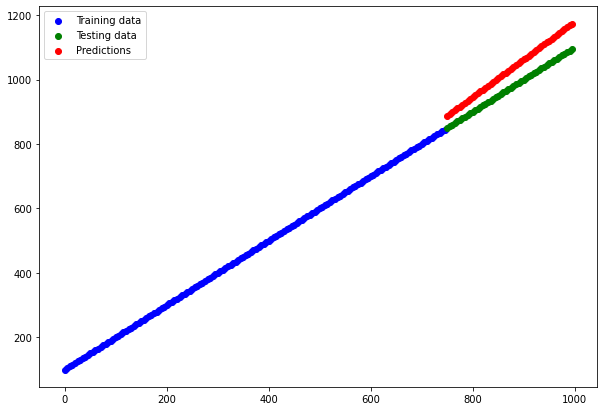

In [23]:
#make prediction with our trained model
y_reg_preds =model_4.predict(X_reg_test)

#plot the models prediction against the regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();


In [24]:
tf.size(y_reg_preds),tf.size(X_reg_test)

(<tf.Tensor: shape=(), dtype=int32, numpy=50>,
 <tf.Tensor: shape=(), dtype=int32, numpy=50>)

## The missing piece:Non-Linearity



In [25]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)    
])
#compile
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics =["accuracy"])

# Fitting the model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

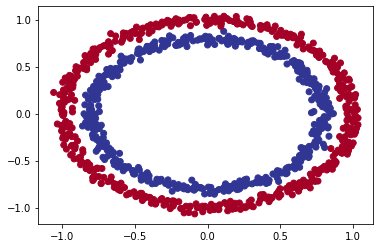

In [26]:
#check out the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classification


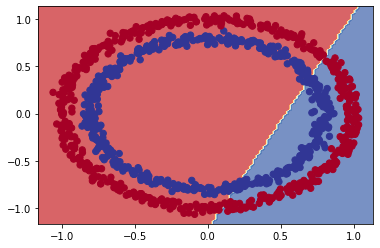

In [27]:
plot_decision_boundary(model=model_5,X=X,y=y)

# since our data is not straight we have to add non-linearity to our model

In [28]:
#Setting random seed 
tf.random.set_seed(42)

#creating model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(1)   # Output layer    
])
#compile 
model_5.compile(loss =tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fitting the model
model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0406 - accuracy: 0.4550
Epoch 11/

In [29]:
# try to replicate multilayer model

# set random seed
tf.random.set_seed(42)

#create
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 ,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1)  #output layer
])

#compile
model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_6.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

# using activation function for output layer
 

In [30]:
# set seed
tf.random.set_seed(42)

#create 
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation ="sigmoid")
])

#compiling
model_7.compile(loss =tf.keras.losses.binary_crossentropy,
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#model fitting
history = model_7.fit(X,y,epochs=200 )


Epoch 1/200
32/32 [==============================] - 1s 4ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


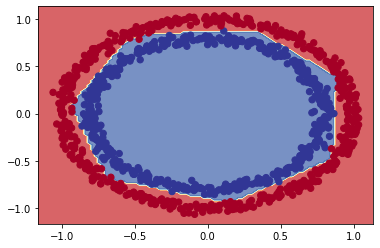

In [31]:
model_7.evaluate(X,y)
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

#concept of linear and non-linear functions


In [32]:
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

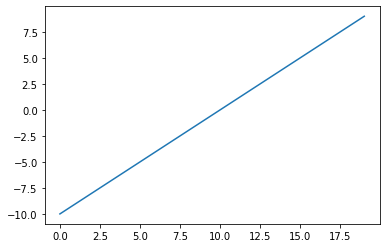

In [33]:
#visualize it
plt.plot(A)

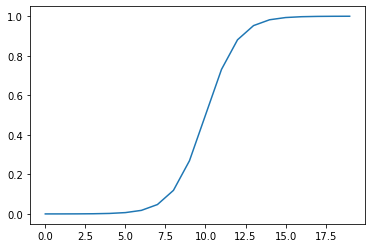

In [34]:
plt.plot(tf.keras.activations.sigmoid(A))

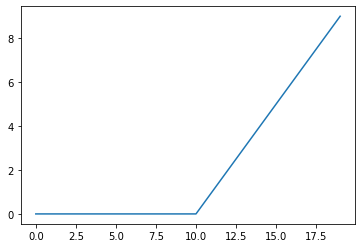

In [35]:
plt.plot(tf.keras.activations.relu(A))

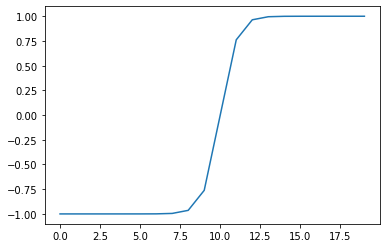

In [36]:
plt.plot(tf.keras.activations.tanh(A))

## Evaluating and imporving our classification
so far we've been training and testing on th esame dataset
however,in machine learning this is basically a sin
so let's create a training and test set.
 

In [37]:
len(X)

1000

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [39]:
#set random seed
tf.random.set_seed(42)

#creating model
model_8 =tf.keras.Sequential([
    tf.keras.layers.Dense(10 ,activation="relu"),
    tf.keras.layers.Dense(10 ,activation="relu"),
    tf.keras.layers.Dense(1 ,activation="sigmoid")
])

#compiling
model_8.compile(loss =tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])
#model Fitting
history = model_8.fit(X_train,y_train,epochs=50)

#evaluate
model_8.evaluate(X_test,y_test)

Epoch 1/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6087
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6087
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.7788
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.8475
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.9525
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.9438
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9887
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1364 - accuracy: 0.9975
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9987
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0716 - accuracy: 0.9975
Epoch 11/50
25/25 [

[0.012674052268266678, 0.9950000047683716]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


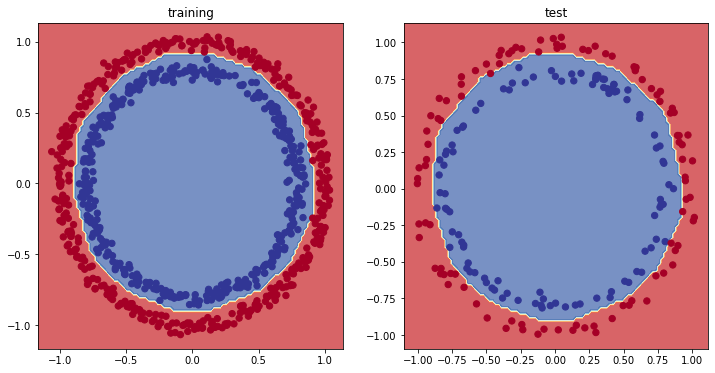

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("training")
plot_decision_boundary(model=model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model=model_8,X= X_test,y=y_test)
plt.show()

In [41]:
#coverting  history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.679752,0.60875
1,0.658828,0.60875
2,0.620317,0.77875
3,0.552995,0.84750
4,0.440068,0.95250
5,0.331901,0.94375
6,0.220178,0.98875
7,0.136428,0.99750
8,0.090251,0.99875
9,0.071609,0.99750


Text(0.5, 1.0, 'model_8 loss curves')

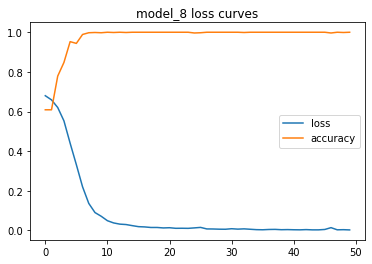

In [42]:
# the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")

# Finding the best lr(learning rate)
to find the ideal learning raet (the rate at which the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - yu can think of a callback as an extra piece of functionality, you can add to your model while its training
* Another model 
* modified loss curve plot

In [43]:
#set random seed
tf.random.set_seed(42)

# create model
model_9 =tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compiling
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a lr callback
lr_scheduler =tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10 ** (epoch/20))

#model fitting
history_9=model_9.fit(X_train,
                  y_train,
                  epochs=100,
                  callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

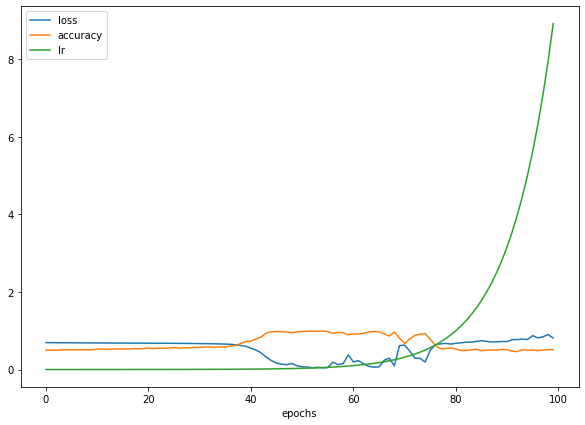

In [44]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs");

Text(0.5, 1.0, 'lr vs loss')

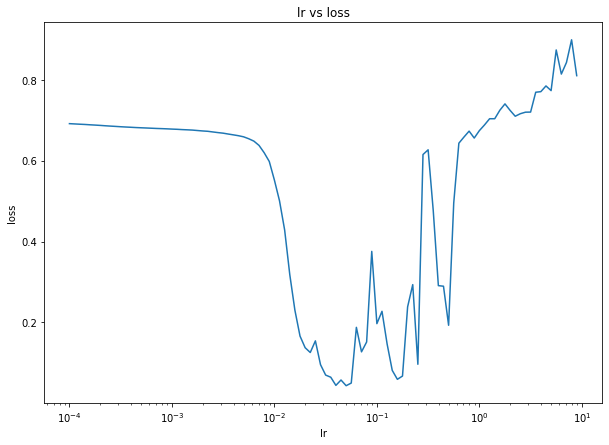

In [45]:
# plot the learning raet versus the loss
lrs = 1e-4 * (10** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("lr")
plt.ylabel("loss")
plt.title("lr vs loss")

# lets try using a higher ideal lr
0.02

In [46]:
#set the random seed
tf.random.set_seed(42)

#Create the model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

# compiling
model_10.compile(loss = "binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

#model fitting
history_10 =model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 3ms/step - loss: 0.6716 - accuracy: 0.5987
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.7175
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.8825
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.9762
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9887
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9962
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9987
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9987
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9987
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9950
Epoch 11/20
25/25 [===========

In [47]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9950


[0.020042480900883675, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


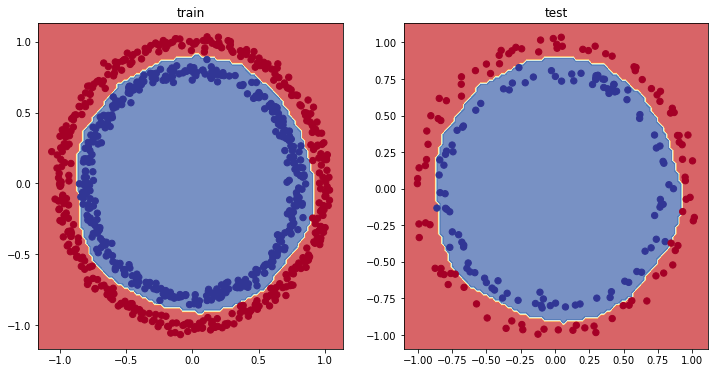

In [48]:
#plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_10,X_test,y_test)

plt.show()

## CLassification evaluation methods
aongside visualizig our models results as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with:

* Accuracy
* Precision
* Recall
-> Trade-off between Precision and Recall
* F1 -score
* Confusion matrix
* Classification report(from scikit-learn)



In [49]:
# Check the accuracy of our model
loss, accuracy= model_10.evaluate(X_test,y_test)
print(f"model loss on the test set:{loss}")
print(f"model accuracy on the test set:{(accuracy*100):.2f}%")


7/7 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9950
model loss on the test set:0.020042480900883675
model accuracy on the test set:99.50%


# How about confusion matrix ?

In [50]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix

#make predictions
y_preds=model_10.predict(X_test)

# Create Confusion matrix
#confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


Oops.. looks like our prediction array has out in prediction probability form.. the standard output of the softmax and sigmoid activation functions.



In [51]:
# Convert the prediction probability and turn them into binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [52]:
confusion_matrix(y_test,tf.round(y_preds))

array([[100,   0],
       [  1,  99]])

# prettifying our consfusion matrix
 

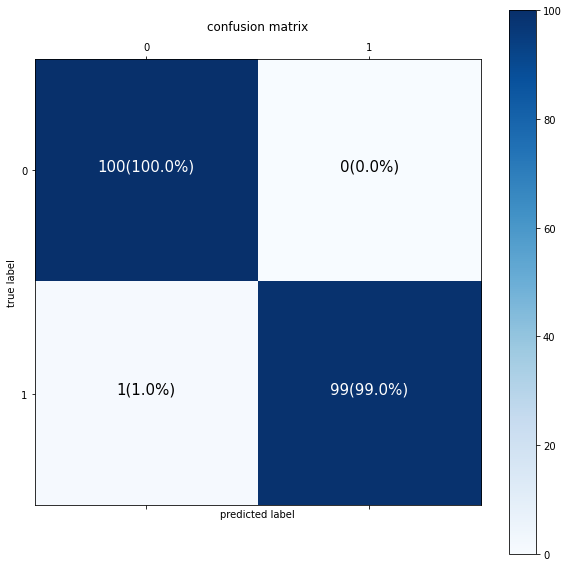

In [53]:
# the confusion matrix code is a remix of sklearn's plot_confusion_matrix 

import itertools

figsize=(10,10)

#create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))

cm_norm = cm.astype("float")/cm.sum(axis = 1)[:,np.newaxis] #normalize our confusion matrix
n_classes =cm.shape[0]

# let's prettify it
fig,ax =plt.subplots(figsize = figsize)
#create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
  labels=classes
else:
  labels =np.arange(cm.shape[0])

#label the axis
ax.set(title="confusion matrix",
       xlabel="predicted label",
       ylabel="true label",
       xticks = np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels = labels,
       yticklabels=labels)

#  set the threshold for different colors
threshold = (cm.max()+cm.min())/2

#plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size =15)

## Working with larger example(multi-class classification)

when you have more than two classes as an option is called multi-class classification

to practice multi-class classification,we're going to build a neural network to classify images of different items of clothing.


In [54]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist



In [55]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()


In [56]:
print(f"Training sample:/n{train_data[0]}\n")
print(f"Training label:/n{train_labels[0]}\n")

Training sample:/n[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [57]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

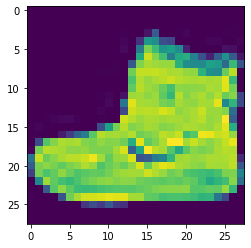

In [58]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [59]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)


10

Text(0.5, 1.0, 'T-shirt/top')

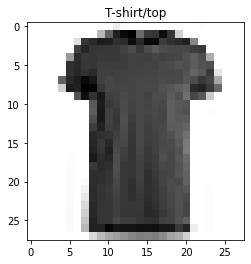

In [60]:
index_of_choice =17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

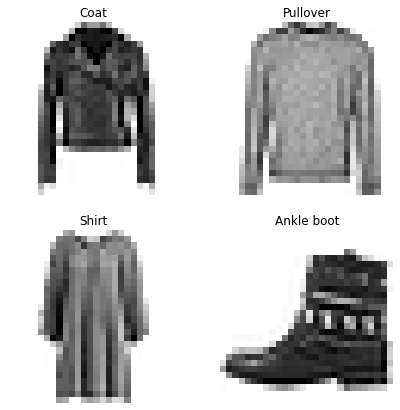

In [61]:
# plot multiple random images of the fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building multi-class classification model

For our multi-clss classification model,we can use a similar architecture to our binar classification, however, we're going to have to tweak a few things:

* Input shape = 28 x 28 (shape of one image)
* Output shape = 28 x 28 (one per class clothing)
* Loss Function = tf.keras.losses.CategoricalCrossentropy()
  * if your labels are one hot encoded(use tf.one_hot to do that) then use CategoricalCrossentropy() 
  * and if not then use SparseCategoricalCrossentropy() 
* Output Layers activation = Softmax(not sigmoid)

In [62]:
# set random seed()
tf.random.set_seed(42)
input_shape = 28*28
#creating model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)), #data needs to be flattens(flattens the data into one long vector)
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#model compiling

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# model fitting
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels,depth=10),
                                epochs=10,
                                validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1785 - accuracy: 0.1595 - val_loss: 1.8202 - val_accuracy: 0.2073
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7087 - accuracy: 0.2492 - val_loss: 1.6566 - val_accuracy: 0.2703
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6358 - accuracy: 0.2819 - val_loss: 1.6062 - val_accuracy: 0.2942
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6092 - accuracy: 0.2887 - val_loss: 1.6110 - val_accuracy: 0.2829
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6027 - accuracy: 0.2990 - val_loss: 1.5787 - val_accuracy: 0.3235
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5870 - accuracy: 0.3117 - val_loss: 1.5688 - val_accuracy: 0.3256
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5797 - accuracy: 0.3189 - val_loss: 1.5725 - val_accuracy:

In [63]:
# cheack the min and max value of the training data
train_data.min(),train_data.max()

(0, 255)

# Neural netwrok tend to prefer normalized data(or scaled), means the like to have the numbers in the tensors they try to find patterns between 0 and 1.


In [64]:
# we can get your training and testing data between 0 and 1 by dividing by the maximum

In [65]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# check min and max for train_data_norm and test_data_norm
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

# create a model for new norm data

In [66]:
# set random seed
tf.random.set_seed(42)

# create model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#model compiling
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#model fitting
norm_history=model_12.fit(train_data_norm,
                          tf.one_hot(train_labels,depth=10),
                          epochs=10,
                          validation_data = (test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## the same model can produce dramatically different results. so when comparing models its important to make sure you're comparing them on same architecture but different data or vice-versa

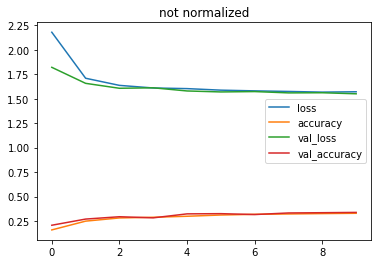

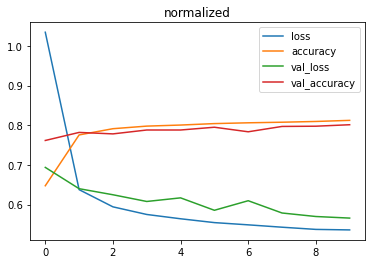

In [67]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="not normalized")
pd.DataFrame(norm_history.history).plot(title="normalized")

# finding the ideal learning rate

In [68]:
#Set random seed
tf.random.set_seed(42)

#create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="sigmoid")
])

#model compiling
model_13.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer =tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))

#model fitting
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'finding the idea lr')

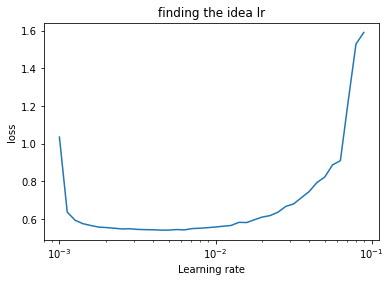

In [69]:
#plot the lr decay lr curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("finding the idea lr")

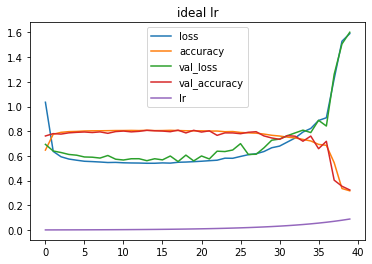

In [70]:
pd.DataFrame(find_lr_history.history).plot(title="ideal lr")

# from graph we get to know that ideal lr is 0.0001 

In [71]:
#set random seed
tf.random.set_seed(42)

#create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(10,activation="sigmoid")   
])

#model compiling
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer =tf.keras.optimizers.Adam(0.001),
                 metrics=["accuracy"])
#model fitting
history = model_14.fit(train_data_norm,
                       train_labels,
                       epochs=40,
                       validation_data=(test_data_norm,test_labels))


Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

# Evaluating our multi-class model

to evaluate our multi class classification model we could:
* Evaluate its performance using other classifciation metrics
(such as confusion matrix)
* Assess some of its predictions(through visualizations)
* improve its results(by training it for longer
* Save and export it for use in an application

Let's go to top 2

In [72]:
# create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

figsize=(10,10)

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

  #create the confusion matrix
  cm = confusion_matrix(y_true,y_pred)

  cm_norm = cm.astype("float")/cm.sum(axis = 1)[:,np.newaxis] #normalize our confusion matrix
  n_classes =cm.shape[0]

  # let's prettify it
  fig,ax =plt.subplots(figsize = figsize)
  #create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels as classes
  if classes:
    labels=classes
  else:
    labels =np.arange(cm.shape[0])

  #label the axis
  ax.set(title="confusion matrix",
        xlabel="predicted label",
        ylabel="true label",
        xticks = np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels = labels,
        yticklabels=labels)

  #  set the threshold for different colors
  threshold = (cm.max()+cm.min())/2

  #plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size =text_size)

In [73]:
# make some predictions with our model
y_probs=model_14.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.04760204e-06, 5.16227885e-07, 7.89368525e-02, 3.01287021e-03,
        9.55460891e-02, 9.99379754e-01, 2.44269584e-04, 9.95912373e-01,
        9.59634662e-01, 9.99728501e-01],
       [2.09037401e-03, 4.90353675e-14, 9.91027892e-01, 9.18757141e-05,
        7.51210570e-01, 4.02570535e-15, 8.92817438e-01, 7.02700509e-37,
        5.18857539e-02, 1.89168044e-13],
       [6.23242915e-01, 9.99974132e-01, 4.00436111e-03, 9.82175648e-01,
        3.71146083e-01, 2.32470360e-17, 2.18980581e-01, 4.39797244e-12,
        2.02046987e-03, 2.20135703e-07],
       [1.93474069e-01, 9.99824345e-01, 3.99192376e-03, 9.48657572e-01,
        4.02882367e-01, 1.08563059e-15, 1.02574624e-01, 2.70747952e-10,
        3.49343941e-03, 6.26232850e-06],
       [7.60373473e-01, 5.20030735e-05, 7.39232779e-01, 1.79439127e-01,
        4.14272219e-01, 8.86714522e-17, 9.35190678e-01, 5.91507927e-28,
        1.05729429e-02, 3.29198013e-13]], dtype=float32)

In [74]:
#convert all of th eprediction probablitites into integers
y_preds =y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[834,  13,  11,  53,   3,   2,  73,   0,  11,   0],
       [  6, 950,   1,  26,   5,   1,  11,   0,   0,   0],
       [ 42,   1, 593,   8, 164,   1, 178,   0,  13,   0],
       [ 74,  27,  10, 787,  35,   1,  56,   2,   8,   0],
       [  2,   1,  84,  29, 726,   0, 151,   0,   7,   0],
       [  0,   1,   0,   0,   0, 940,   0,  35,   3,  21],
       [217,   8, 118,  35,  98,   3, 505,   0,  16,   0],
       [  0,   0,   0,   0,   0,  70,   0, 904,   0,  26],
       [ 16,   1,  32,  19,   5,   9,   8,   5, 905,   0],
       [  0,   0,   0,   0,   1,  36,   0,  49,   5, 909]])

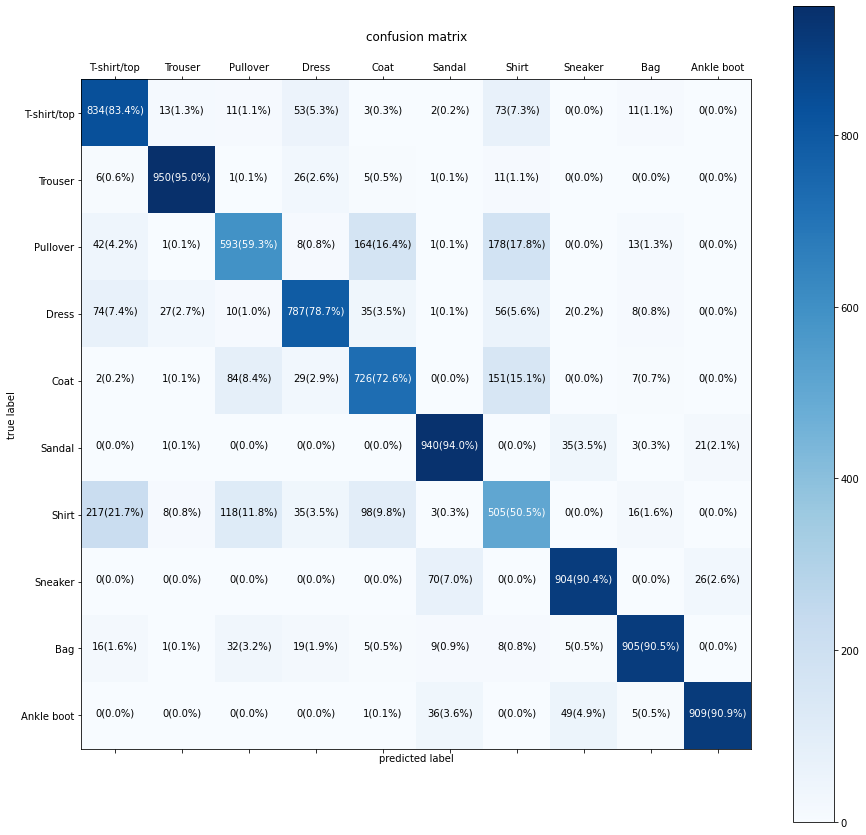

In [76]:
# make confusion matrix prettier
make_confusion_matrix (y_true =test_labels,
                       y_pred=y_preds,
                       classes = class_names,
                       figsize=(15,15),
                       text_size=10)

# creating a function for:
* plotting random image
* make prediction on said image
* Label the plot with truth label and predicted label

In [77]:
import random

def plot_random_image(model,images,true_labels,classes):
  """
  picks a random image,plots it and labels it with a prediction and truth label
  """
  #set up random integer
  i=random.randint(0,len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  #plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)
  
  #change the color of the titles depending whether the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color="red"
  
  #add xlabel
  plt.xlabel("Pred:{} {:2.0f} % (True:{})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
             color=color)

1/1 [==============================] - 0s 16ms/step


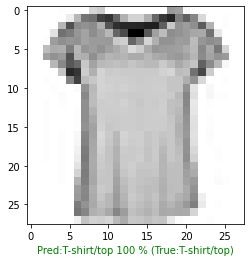

In [82]:
#check out a random image as well as its prediction

plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes = class_names)